In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Задаем параметры для генерации данных
n_rows = 1000 # количество строк в датафрейме
n_cols = 6 # количество колонок в датафрейме
col_names = ['Product_type', 'Operation_1', 'Operation_2', 'Operation_3',
'Quality_parameter', 'Defect_type'] # названия колонок
col_types = ['categorical', 'numeric', 'numeric', 'numeric', 'numeric',
'categorical'] # типы колонок
col_ranges = [(0, 1), (0, 10), (0, 10), (0, 10), (0, 100), (0, 2)] #диапазоны значений для каждой колонки
col_means = [0.5, 5, 5, 5, 50, 0.5] # средние значения для каждой колонки
col_stds = [0.5, 1, 1, 1, 10, 0.5] # стандартные отклонения для каждой колонки
col_corrs = [0.1, 0.2, -0.3, 0.4, -0.5, -0.6] # коэффициенты корреляции между каждой колонкой и целевой переменной

In [7]:
# Создаем пустой датафрейм
df = pd.DataFrame()

In [8]:
# Генерируем данные для каждой колонки
for i in range(n_cols):
    # Определяем тип колонки
    col_type = col_types[i]
    # Определяем диапазон значений для колонки
    col_range = col_ranges[i]
    # Определяем среднее значение для колонки
    col_mean = col_means[i]
    # Определяем стандартное отклонение для колонки
    col_std = col_stds[i]
    # Определяем коэффициент корреляции между колонкой и целевой переменной
    col_corr = col_corrs[i]
    # Генерируем данные в зависимости от типа колонки
    if col_type == 'categorical':
        # Генерируем категориальные данные с заданным диапазоном и средним
        col_data = np.random.binomial(col_range[1], col_mean, n_rows)
    elif col_type == 'numeric':
        # Генерируем нормально распределенные числа с заданным средним и стандартным отклонением
        col_data = np.random.normal(col_mean, col_std, n_rows)
    # Приводим числа к заданному диапазону
    col_data = np.clip(col_data, col_range[0], col_range[1])
    # Добавляем колонку к датафрейму
    df[col_names[i]] = col_data

In [9]:
# Модифицируем данные в соответствии с коэффициентами корреляции
for i in range(n_cols):
    # Определяем коэффициент корреляции между колонкой и целевой переменной
    col_corr = col_corrs[i]
    # Определяем тип колонки
    col_type = col_types[i]
    # Модифицируем данные в зависимости от типа колонки
    if col_type == 'categorical':
        # Добавляем или вычитаем случайное число, пропорциональное коэффициенту корреляции, к каждому значению в колонке
        df[col_names[i]] = df[col_names[i]] + np.random.uniform(-1, 1,n_rows) * col_corr
        # Округляем значения до ближайшего целого
        df[col_names[i]] = np.round(df[col_names[i]])
        # Приводим значения к заданному диапазону
        df[col_names[i]] = np.clip(df[col_names[i]], col_range[0],col_range[1])
    elif col_type == 'numeric':
    # Добавляем или вычитаем случайное число, пропорциональное коэффициенту корреляции, к каждому значению в колонке
        df[col_names[i]] = df[col_names[i]] + np.random.uniform(-1, 1, n_rows) * col_corr
data = df

In [10]:
# Преобразуем данные в удобный формат
# Кодируем категориальные переменные в числовые
data['Product_type'] = data['Product_type'].abs().astype(int)
data['Defect_type'] = data['Defect_type'].abs().astype(int)
#data['Product_type'] = data['Product_type'].map({'A': 0, 'B': 1})
#data['Defect_type'] = data['Defect_type'].map({'None': 0, 'Minor': 1,'Major': 2})

In [11]:
# Разделяем данные на признаки и целевую переменную
X = data.drop('Defect_type', axis=1) # признаки
y = data['Defect_type'] # целевая переменная

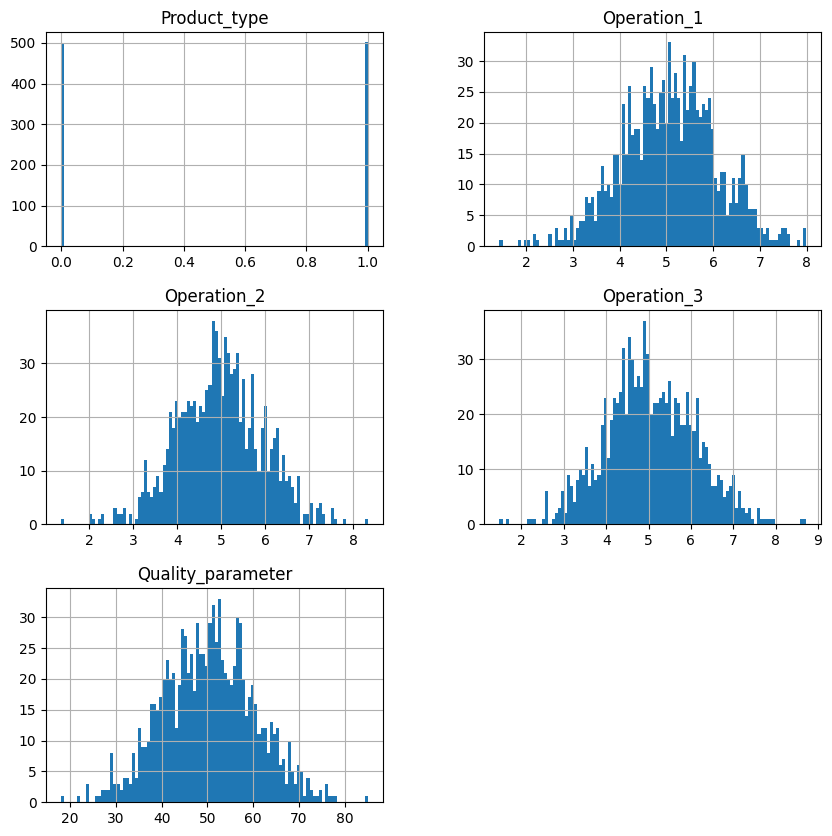

In [13]:
# Анализируем качество продукции
# Строим гистограммы для каждого признака
X.hist(figsize=(10, 10), bins = 100)
plt.show()

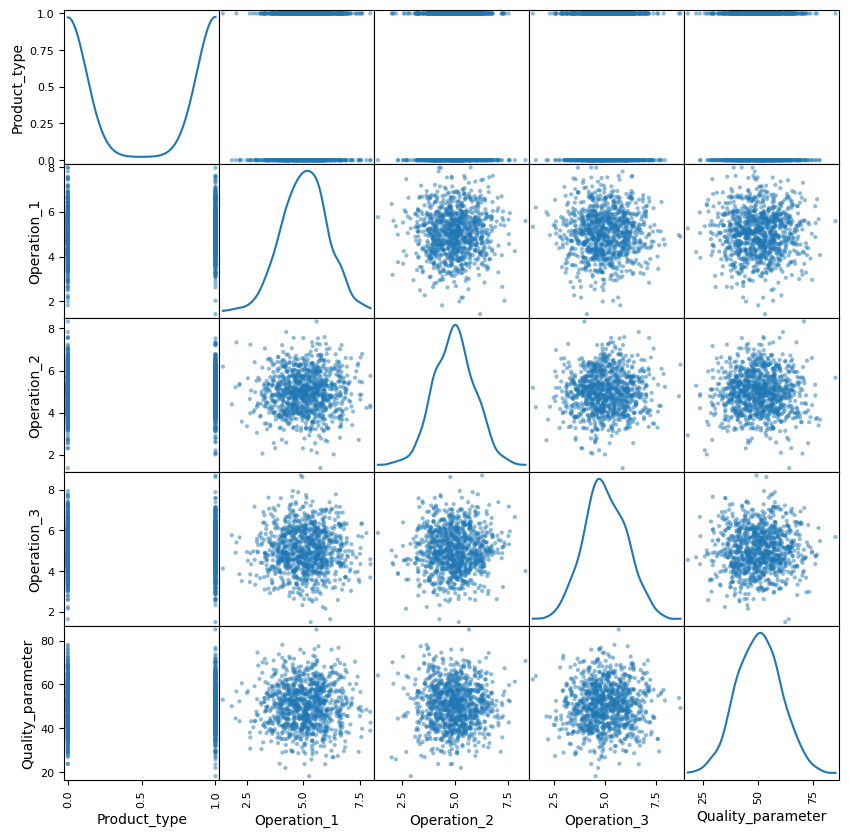

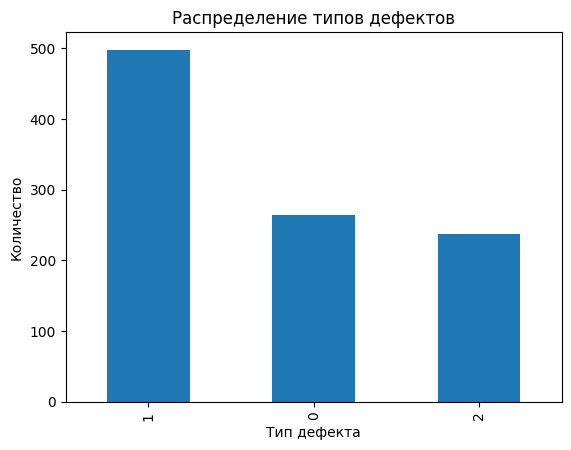

In [14]:
# Строим диаграмму рассеяния для каждой пары признаков
pd.plotting.scatter_matrix(X, figsize=(10, 10), diagonal='kde')
plt.show()
# Строим столбчатую диаграмму для целевой переменной
y.value_counts().plot(kind='bar')
plt.xlabel('Тип дефекта')
plt.ylabel('Количество')
plt.title('Распределение типов дефектов')
plt.show()

Делаем выводы об анализе качества продукции

Видим, что данные имеют разный масштаб и распределение

Видим, что некоторые признаки имеют линейную или нелинейную связь между
собой

Видим, что большинство продукции не имеет дефектов, а меньшинство имеет
мелкие или крупные дефекты

Выбираем модель для автоматического контроля качества

Поскольку мы имеем дело с задачей многоклассовой классификации, мы можем
использовать логистическую регрессию

Логистическая регрессия - это модель, которая предсказывает вероятность
принадлежности к каждому классу на основе линейной комбинации признаков

Для обучения логистической регрессии мы будем использовать библиотеку
sklearn

Обучаем модель на исторических данных о качестве продукции

Разделяем данные на обучающую и тестовую выборки

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабируем данные для улучшения работы модели
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Создаем и обучаем модель логистической регрессии
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [16]:
# Применяем обученную модель для автоматического контроля качества продукции в реальном времени
# Предсказываем тип дефекта для тестовой выборки
y_pred = model.predict(X_test)
# Оцениваем качество модели по различным метрикам
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.495
Confusion matrix:
 [[ 0 50  0]
 [ 0 99  0]
 [ 0 51  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      1.00      0.66        99
           2       0.00      0.00      0.00        51

    accuracy                           0.49       200
   macro avg       0.17      0.33      0.22       200
weighted avg       0.25      0.49      0.33       200



/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w

In [24]:
# Создаем систему оповещений о дефектах и автоматического реагирования на аномалии
# Предположим, что мы хотим оповещать об ответственных лиц о дефектах и предпринимать соответствующие меры
# Тогда мы можем создать следующую функцию для этого
def alert_and_react(X, y):
    # Предсказываем тип дефекта для данной партии продукции
    y_pred = model.predict(X)
    # Сравниваем предсказанный тип с фактическим
    if all(y_pred == y.to_numpy()): # если совпадают, то все хорошо
        print('Продукция соответствует стандартам качества.')
    else: # если не совпадают, то есть дефект
        print('Обнаружен дефект в продукции.')
    # Определяем тип дефекта
    if all(y_pred == 0): # если предсказано, что нет дефекта, а на самом деле есть
        defect_type = y.to_numpy() # то тип дефекта равен фактическому
    else: # если предсказано, что есть дефект
        defect_type = y_pred # то тип дефекта равен предсказанному
    # Определяем уровень серьезности дефекта
    if all(defect_type == 1): # если дефект мелкий
        severity = 'Низкий'
    elif all(defect_type == 2): # если дефект крупный
        severity = 'Высокий'
    else:
        severity = 'Смешанный'
    # Оповещаем ответственных лиц о дефекте
    print(f'Оповещение: Обнаружен дефект типа {defect_type} с уровнем серьезности {severity}.')
alert_and_react(X_train, y_train)

Обнаружен дефект в продукции.
Оповещение: Обнаружен дефект типа [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

Вариант 3:
- Измените параметры для генерации данных, так чтобы количество строк в
датафрейме было 1000, а количество колонок - 7
- Добавьте новую колонку: Product_id, которая будет иметь тип categorical и
диапазон от 0 до 9
- Задайте среднее значение, стандартное отклонение и коэффициент корреляции для
новой колонки.
- Проведите анализ качества продукции с учетом нового признака.
- Выберите и обучите другую модель для автоматического контроля качества,
например, нейронную сеть или опорные вектора.
- Сравните качество моделей по различным метрикам и сделайте выводы.

In [50]:
# Задаем параметры для генерации данных
n_rows = 1000 # количество строк в датафрейме
n_cols = 7 # количество колонок в датафрейме
col_names = ['Product_type', 'Operation_1', 'Operation_2', 'Operation_3',
'Quality_parameter', 'Product_id', 'Defect_type'] # названия колонок
col_types = ['categorical', 'numeric', 'numeric', 'numeric', 'numeric',
'categorical', 'categorical'] # типы колонок
col_ranges = [(0, 1), (0, 10), (0, 10), (0, 10), (0, 100), (0, 9), (0, 2)] #диапазоны значений для каждой колонки
col_means = [0.5, 5, 5, 5, 50, 0.5, 0.5] # средние значения для каждой колонки
col_stds = [0.5, 1, 1, 1, 10, 0.5, 10] # стандартные отклонения для каждой колонки
col_corrs = [0.1, 0.2, -0.3, 0.4, -0.5, -0.6, 0.3] # коэффициенты корреляции между каждой колонкой и целевой переменной

In [51]:
# Создаем пустой датафрейм
df = pd.DataFrame()

In [52]:
# Генерируем данные для каждой колонки
for i in range(n_cols):
    # Определяем тип колонки
    col_type = col_types[i]
    # Определяем диапазон значений для колонки
    col_range = col_ranges[i]
    # Определяем среднее значение для колонки
    col_mean = col_means[i]
    # Определяем стандартное отклонение для колонки
    col_std = col_stds[i]
    # Определяем коэффициент корреляции между колонкой и целевой переменной
    col_corr = col_corrs[i]
    # Генерируем данные в зависимости от типа колонки
    if col_type == 'categorical':
        col_data = np.random.binomial(col_range[1], col_mean, n_rows)
    elif col_type == 'numeric':
        # Генерируем нормально распределенные числа с заданным средним и стандартным отклонением
        col_data = np.random.normal(col_mean, col_std, n_rows)
    # Приводим числа к заданному диапазону
    col_data = np.clip(col_data, col_range[0], col_range[1])
    # Добавляем колонку к датафрейму
    df[col_names[i]] = col_data

In [53]:
# Модифицируем данные в соответствии с коэффициентами корреляции
for i in range(n_cols):
    # Определяем коэффициент корреляции между колонкой и целевой переменной
    col_corr = col_corrs[i]
    # Определяем тип колонки
    col_type = col_types[i]
    # Модифицируем данные в зависимости от типа колонки
    if col_type == 'categorical':
        # Добавляем или вычитаем случайное число, пропорциональное коэффициенту корреляции, к каждому значению в колонке
        df[col_names[i]] = df[col_names[i]] + np.random.uniform(-1, 1,n_rows) * col_corr
        # Округляем значения до ближайшего целого
        df[col_names[i]] = np.round(df[col_names[i]])
        # Приводим значения к заданному диапазону
        df[col_names[i]] = np.clip(df[col_names[i]], col_range[0],col_range[1])
    elif col_type == 'numeric':
    # Добавляем или вычитаем случайное число, пропорциональное коэффициенту корреляции, к каждому значению в колонке
        df[col_names[i]] = df[col_names[i]] + np.random.uniform(-1, 1, n_rows) * col_corr
data = df

In [54]:
# Преобразуем данные в удобный формат
# Кодируем категориальные переменные в числовые
data['Product_type'] = data['Product_type'].abs().astype(int)
data['Defect_type'] = data['Defect_type'].abs().astype(int)
#data['Product_type'] = data['Product_type'].map({'A': 0, 'B': 1})
#data['Defect_type'] = data['Defect_type'].map({'None': 0, 'Minor': 1,'Major': 2})

In [55]:
# Разделяем данные на признаки и целевую переменную
X = data.drop('Defect_type', axis=1) # признаки
y = data['Defect_type'] # целевая переменная

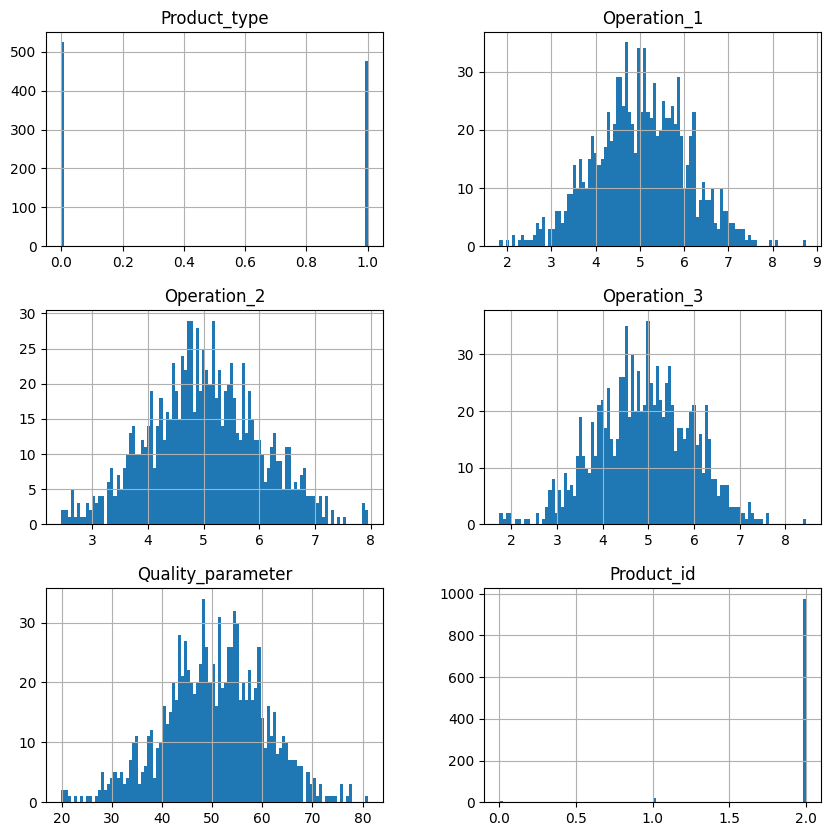

In [56]:
# Анализируем качество продукции
# Строим гистограммы для каждого признака
X.hist(figsize=(10, 10), bins = 100)
plt.show()

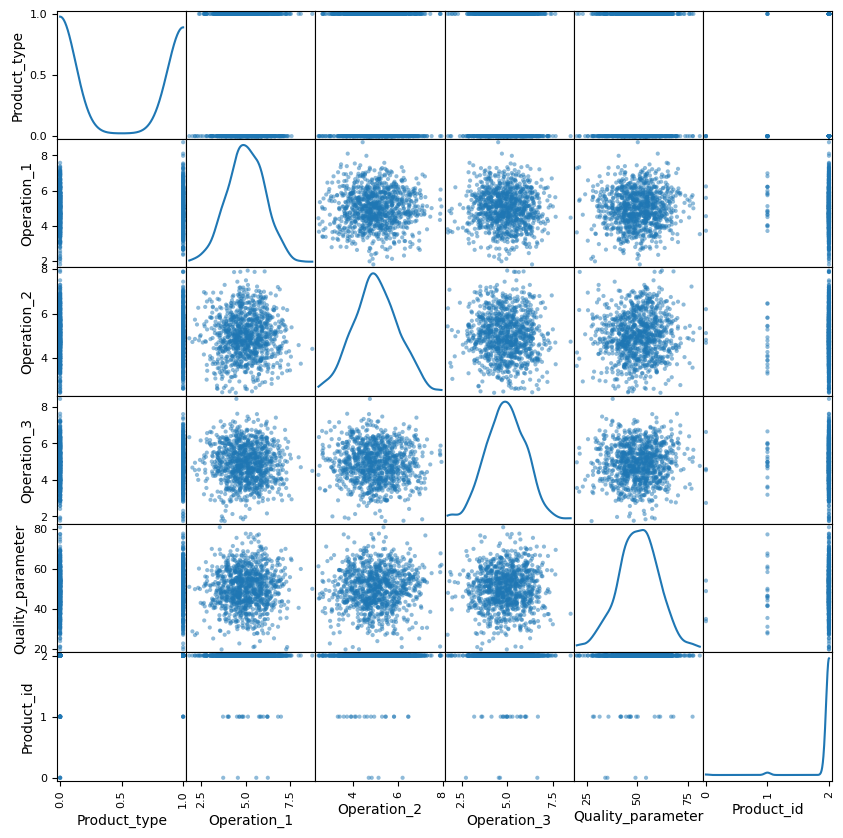

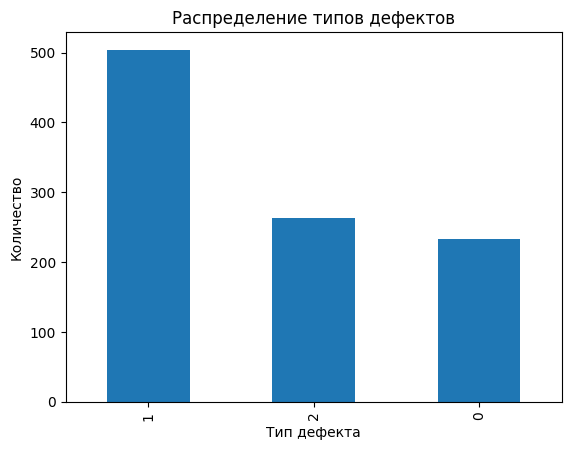

In [57]:
# Строим диаграмму рассеяния для каждой пары признаков
pd.plotting.scatter_matrix(X, figsize=(10, 10), diagonal='kde')
plt.show()
# Строим столбчатую диаграмму для целевой переменной
y.value_counts().plot(kind='bar')
plt.xlabel('Тип дефекта')
plt.ylabel('Количество')
plt.title('Распределение типов дефектов')
plt.show()

Видим, что данные имеют разный масштаб и распределение

Видим, что некоторые признаки имеют линейную или нелинейную связь между собой

Видим, что большинство продукции не имеет дефектов, а меньшинство имеет мелкие или крупные дефекты

In [60]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабируем данные для улучшения работы модели
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Создаем и обучаем модель логистической регрессии
model = SVC()
model.fit(X_train, y_train)

SVC()

In [61]:
# Применяем обученную модель для автоматического контроля качества продукции в реальном времени
# Предсказываем тип дефекта для тестовой выборки
y_pred = model.predict(X_test)
# Оцениваем качество модели по различным метрикам
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.46
Confusion matrix:
 [[ 0 47  0]
 [ 0 92  0]
 [ 0 61  0]]
Classification report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.46      1.00      0.63        92
           2       0.00      0.00      0.00        61

    accuracy                           0.46       200
   macro avg       0.15      0.33      0.21       200
weighted avg       0.21      0.46      0.29       200



/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/thypogean/Library/Caches/pypoetry/virtualenvs/lab-works-3wto-hoA-py3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels w